<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 3
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4     X5     X6      X7     X8     X9  \
0     7.426   5.941  3.465  6.436  3.960  6.436  5.446   3.465  2.970  4.950   
1     9.901  16.832  2.970  3.960  2.970  5.941  4.950   1.980  1.980  3.960   
2     7.500  10.000  0.000  2.500  0.000  5.000  5.000   0.000  0.000  5.000   
3     4.286  14.286  1.429  2.857  1.429  5.714  4.286   2.857  1.429  4.286   
4     5.941   4.950  6.931  6.931  0.990  3.960  2.970   1.980  0.990  1.980   
..      ...     ...    ...    ...    ...    ...    ...     ...    ...    ...   
495   7.036   3.412  3.838  5.330  0.853  6.823  3.838  11.940  1.493  3.838   
496   6.027   4.932  6.027  6.575  0.822  7.945  3.288   2.740  2.740  3.288   
497  12.000   5.333  2.667  2.667  2.222  3.556  2.667   5.333  0.444  7.111   
498   8.750   6.528  4.306  6.528  2.500  6.250  2.222   6.111  3.889  4.444 

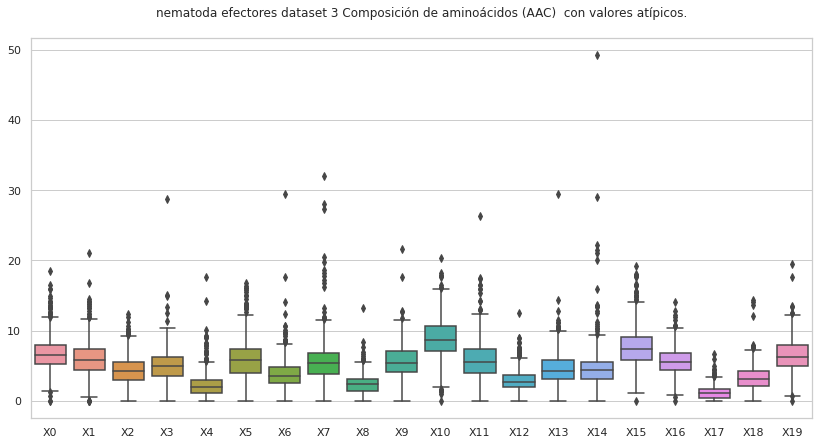

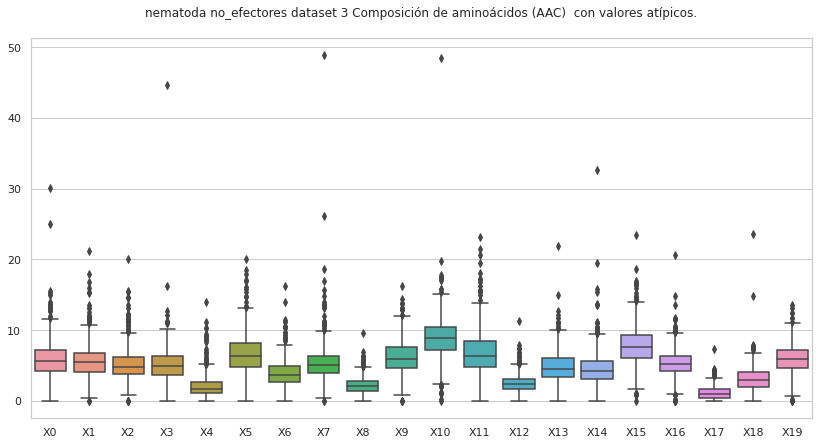

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4     X5     X6      X7     X8     X9  \
0     7.426   5.941  3.465  6.436  3.960  6.436  5.446   3.465  2.970  4.950   
4     5.941   4.950  6.931  6.931  0.990  3.960  2.970   1.980  0.990  1.980   
5     2.817   8.451  5.634  5.634  4.225  7.042  0.000   7.042  4.225  4.225   
6    11.905  10.714  7.143  3.571  2.381  2.381  0.000   8.333  0.000  8.333   
8     6.024   8.434  9.639  3.614  6.024  3.614  6.024   3.614  2.410  6.024   
..      ...     ...    ...    ...    ...    ...    ...     ...    ...    ...   
495   7.036   3.412  3.838  5.330  0.853  6.823  3.838  11.940  1.493  3.838   
496   6.027   4.932  6.027  6.575  0.822  7.945  3.288   2.740  2.740  3.288   
497  12.000   5.333  2.667  2.667  2.222  3.556  2.667   5.333  0.444  7.111   
498   8.750   6.528  4.306  6.528  2.500  6.250  2.222   6.111  3.889  4.444 

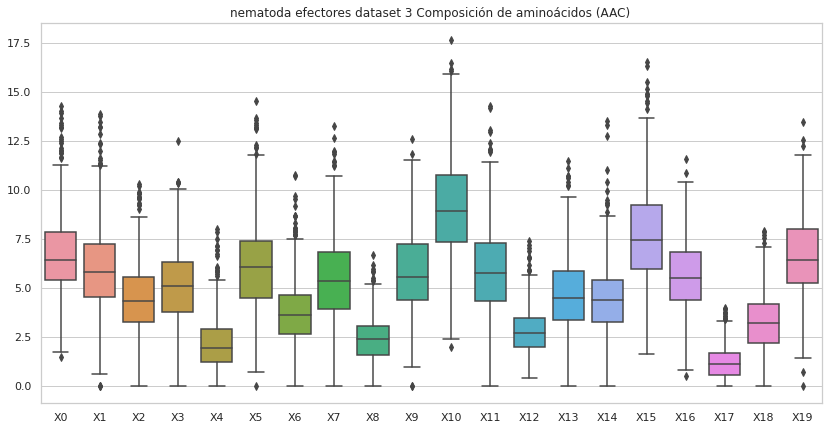

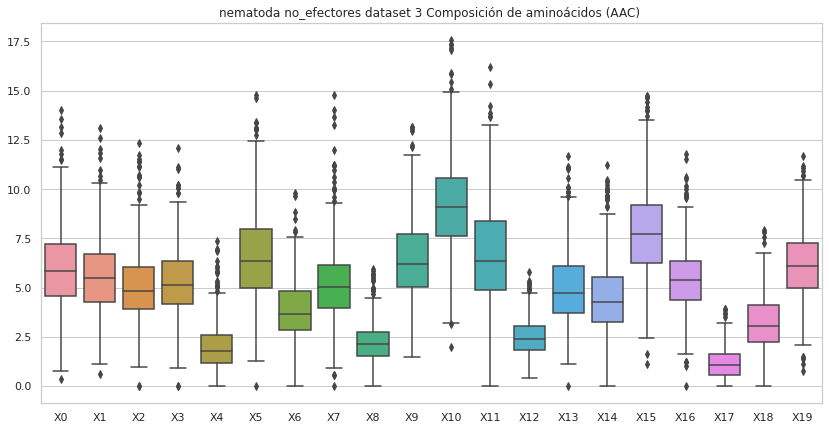

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.052053  0.027761  0.045112  0.045112  0.020821  0.024291  0.020821   
1    0.030081  0.009024  0.012032  0.018049  0.012032  0.006016  0.006016   
2    0.307491  0.000000  0.102497  0.204994  0.102497  0.000000  0.000000   
3    0.016563  0.005521  0.011042  0.022084  0.038647  0.011042  0.005521   
4    0.015532  0.002589  0.018120  0.010355  0.005177  0.005177  0.002589   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.023742  0.002878  0.017987  0.023023  0.013670  0.040290  0.005036   
496  0.014907  0.002033  0.016262  0.019650  0.005421  0.006776  0.006776   
497  0.038569  0.007142  0.008571  0.011428  0.025713  0.017142  0.001428   
498  0.050283  0.014367  0.037513  0.035917  0.016761  0.035118  0.022348   
499  0.0

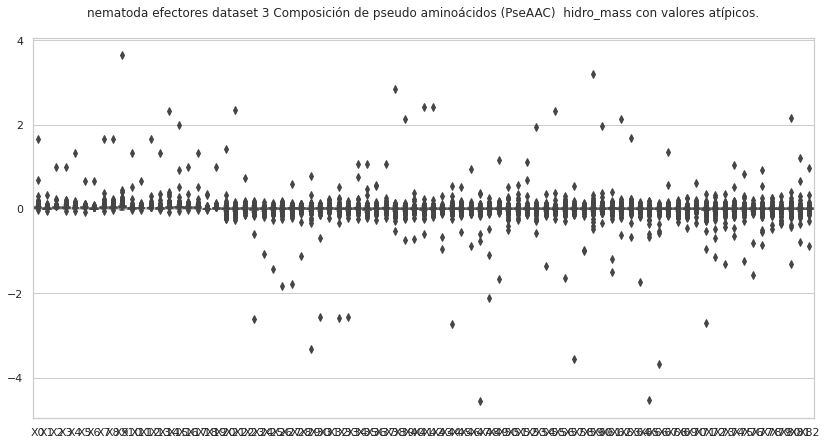

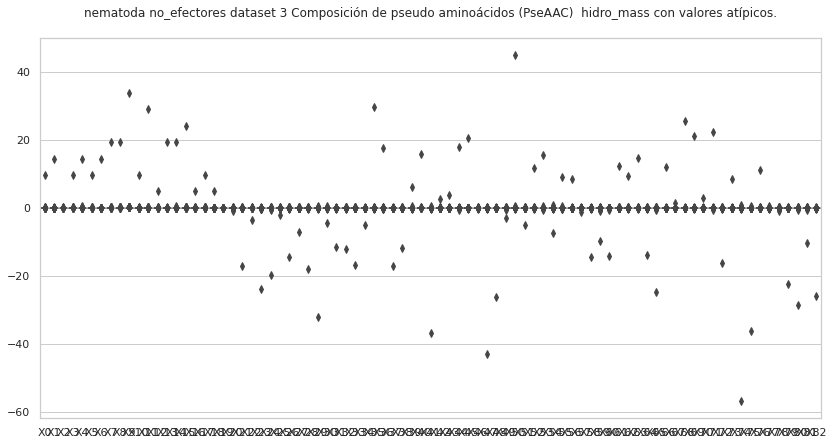

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.052053  0.027761  0.045112  0.045112  0.020821  0.024291  0.020821   
1    0.030081  0.009024  0.012032  0.018049  0.012032  0.006016  0.006016   
3    0.016563  0.005521  0.011042  0.022084  0.038647  0.011042  0.005521   
4    0.015532  0.002589  0.018120  0.010355  0.005177  0.005177  0.002589   
6    0.056178  0.011236  0.016854  0.011236  0.022471  0.039325  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.023742  0.002878  0.017987  0.023023  0.013670  0.040290  0.005036   
496  0.014907  0.002033  0.016262  0.019650  0.005421  0.006776  0.006776   
497  0.038569  0.007142  0.008571  0.011428  0.025713  0.017142  0.001428   
498  0.050283  0.014367  0.037513  0.035917  0.016761  0.035118  0.022348   
499  0.0

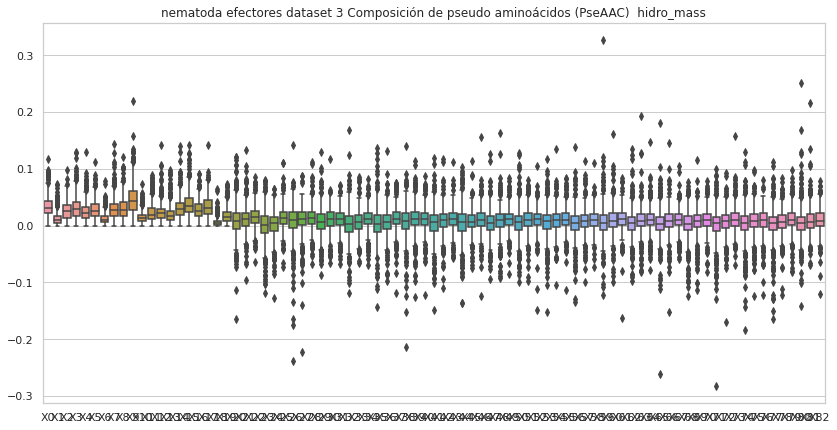

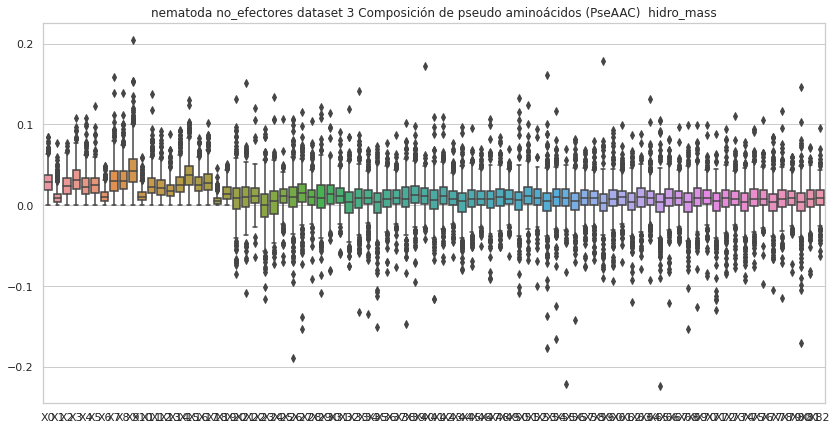

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.067505  0.036003  0.058504  0.058504  0.027002  0.031502  0.027002   
1    0.104985  0.031495  0.041994  0.062991  0.041994  0.020997  0.020997   
2    0.064027  0.000000  0.021342  0.042685  0.021342  0.000000  0.000000   
3    0.051200  0.017067  0.034134  0.068267  0.119468  0.034134  0.017067   
4    0.038406  0.006401  0.044807  0.025604  0.012802  0.012802  0.006401   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.029647  0.003594  0.022460  0.028749  0.017070  0.050310  0.006289   
496  0.036780  0.005015  0.040124  0.048483  0.013375  0.016718  0.016718   
497  0.077319  0.014318  0.017182  0.022909  0.051546  0.034364  0.002864   
498  0.050251  0.014357  0.037489  0.035893  0.016750  0.035096  0.022334   
499  0.065953 

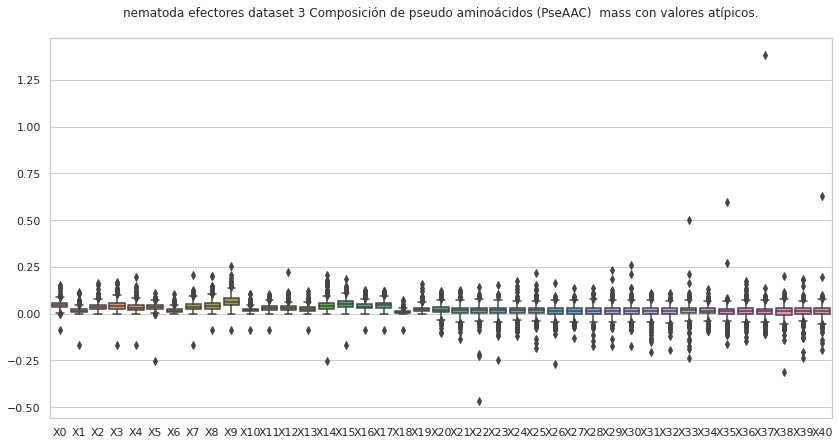

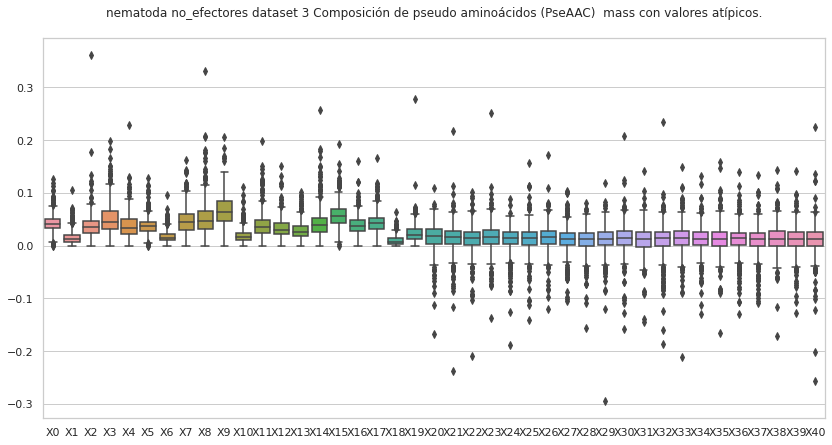

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.067505  0.036003  0.058504  0.058504  0.027002  0.031502  0.027002   
4    0.038406  0.006401  0.044807  0.025604  0.012802  0.012802  0.006401   
6    0.042308  0.008462  0.012692  0.008462  0.016923  0.029616  0.000000   
9    0.041647  0.011713  0.052059  0.059868  0.041647  0.031235  0.020824   
10   0.046494  0.030996  0.023247  0.054243  0.015498  0.046494  0.030996   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.029647  0.003594  0.022460  0.028749  0.017070  0.050310  0.006289   
496  0.036780  0.005015  0.040124  0.048483  0.013375  0.016718  0.016718   
497  0.077319  0.014318  0.017182  0.022909  0.051546  0.034364  0.002864   
498  0.050251  0.014357  0.037489  0.035893  0.016750  0.035096  0.022334   
499  0.065953  0.009422 

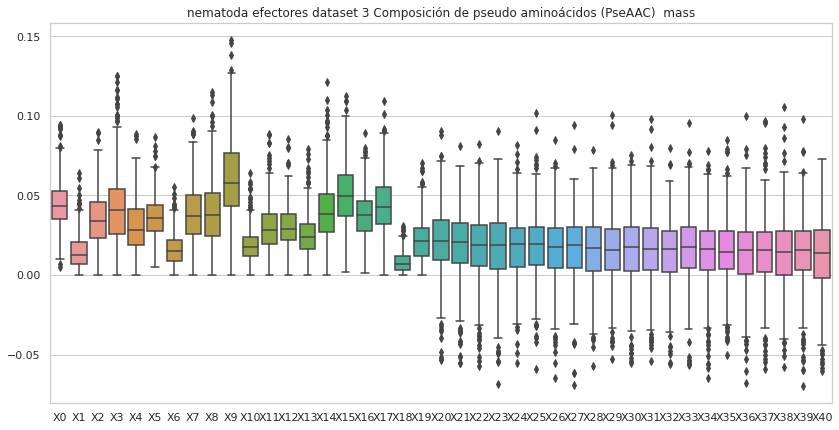

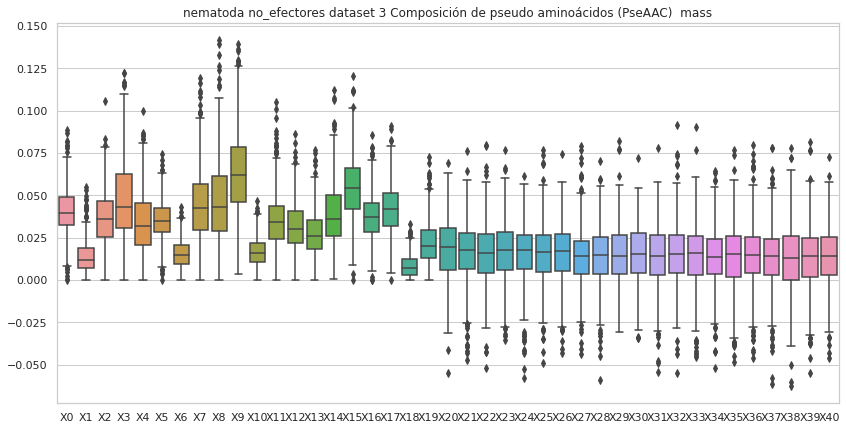

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.055978  0.029855  0.048514  0.048514  0.022391  0.026123  0.022391   
1    0.029570  0.008871  0.011828  0.017742  0.011828  0.005914  0.005914   
2    1.034003  0.000000  0.344668  0.689335  0.344668  0.000000  0.000000   
3    0.015582  0.005194  0.010388  0.020776  0.036358  0.010388  0.005194   
4    0.018123  0.003020  0.021143  0.012082  0.006041  0.006041  0.003020   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.044246  0.005363  0.033520  0.042906  0.025475  0.075085  0.009386   
496  0.017703  0.002414  0.019313  0.023336  0.006438  0.008047  0.008047   
497  0.046888  0.008683  0.010420  0.013893  0.031259  0.020839  0.001737   
498  0.087598  0.025028  0.065351  0.062570  0.029199  0.061180  0.038933   
499  0.041780

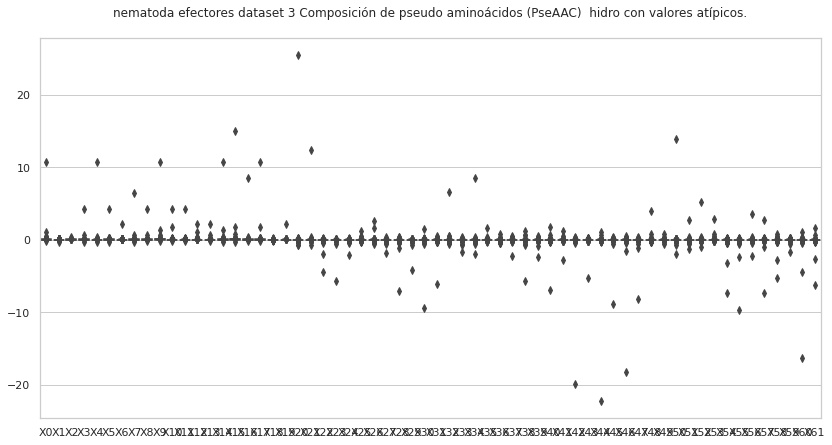

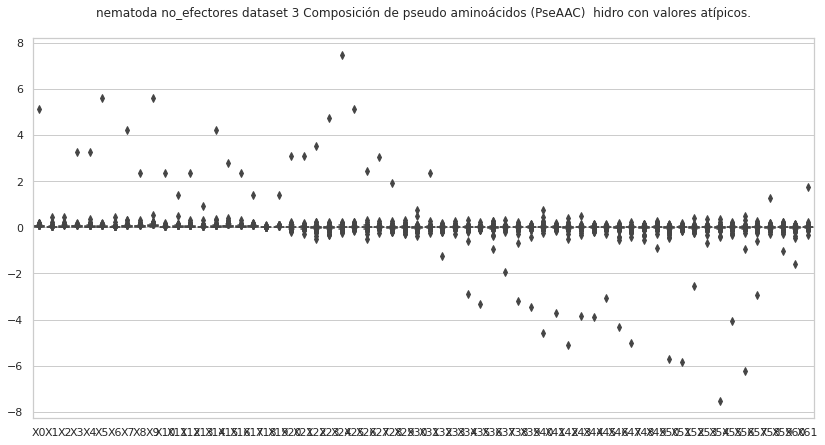

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.055978  0.029855  0.048514  0.048514  0.022391  0.026123  0.022391   
1    0.029570  0.008871  0.011828  0.017742  0.011828  0.005914  0.005914   
3    0.015582  0.005194  0.010388  0.020776  0.036358  0.010388  0.005194   
4    0.018123  0.003020  0.021143  0.012082  0.006041  0.006041  0.003020   
5    0.043883  0.065825  0.087766  0.109708  0.065825  0.109708  0.065825   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.044246  0.005363  0.033520  0.042906  0.025475  0.075085  0.009386   
496  0.017703  0.002414  0.019313  0.023336  0.006438  0.008047  0.008047   
497  0.046888  0.008683  0.010420  0.013893  0.031259  0.020839  0.001737   
498  0.087598  0.025028  0.065351  0.062570  0.029199  0.061180  0.038933   
499  0.041780  0.00

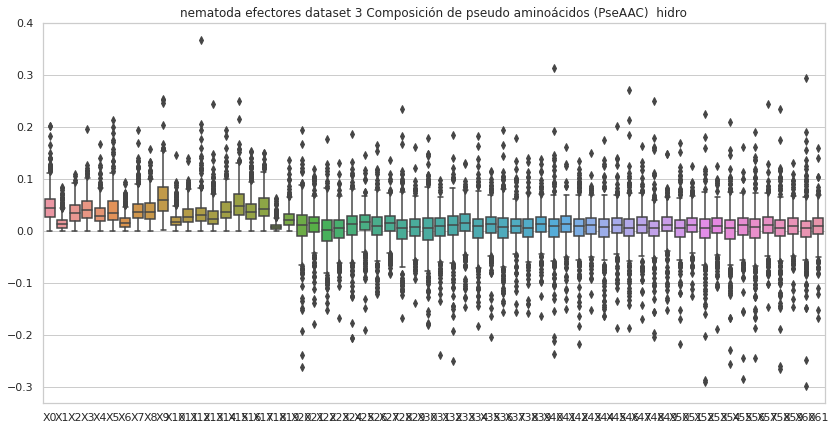

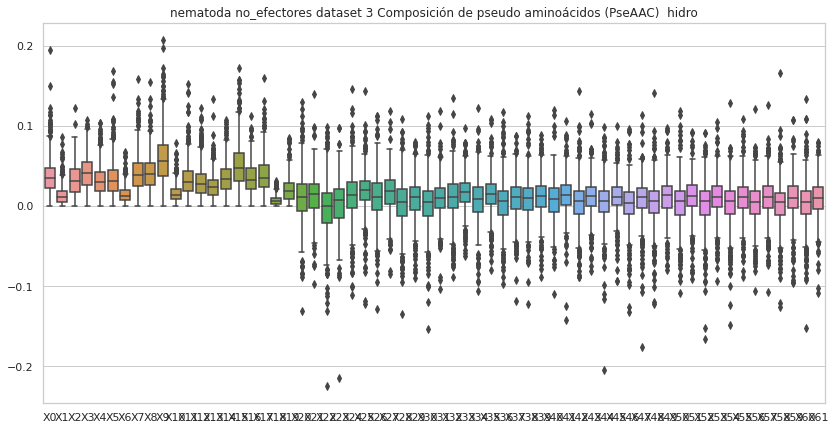

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.067574  0.014875  0.035373 -0.044539 -0.081174 -0.002364  0.026290   
1   -0.038948 -0.021504 -0.063170 -0.002248  0.041282  0.032201  0.005037   
2    0.032394 -0.166128 -0.030822 -0.140125 -0.140222 -0.057108  0.168507   
3    0.034751 -0.121128 -0.018064  0.151695  0.029766 -0.007470  0.081695   
4    0.038887 -0.178362  0.081188  0.217353  0.051034 -0.073401  0.031043   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.040382  0.063172 -0.017651 -0.128119  0.045118  0.051010  0.018887   
496  0.045805  0.001007 -0.026085 -0.056956  0.053699  0.035992 -0.011649   
497  0.027568  0.007965  0.007640 -0.043602 -0.019084  0.056352 -0.099296   
498  0.027346 -0.063347 -0.007162  0.006551  0.012856 -0.041870  0.027789   
499  0.095074 

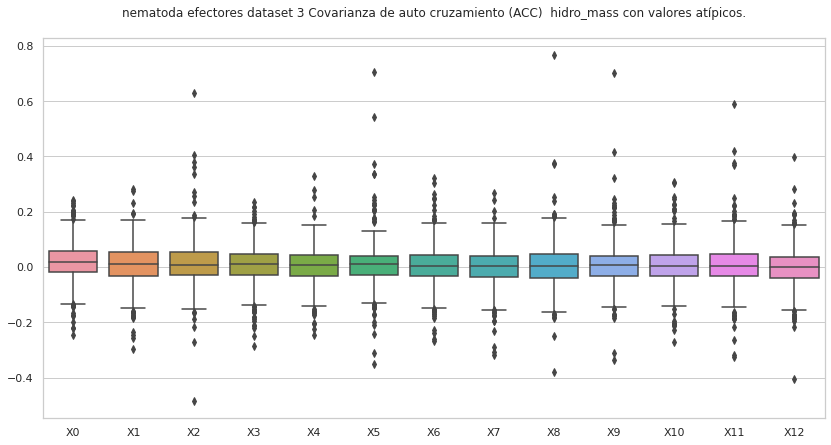

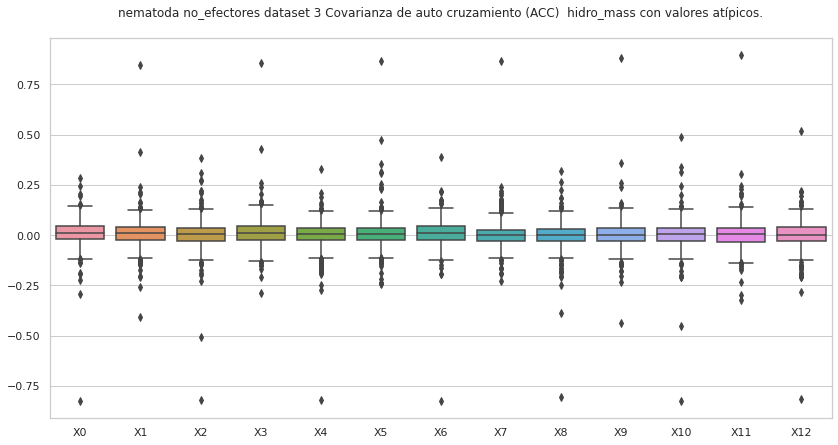

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.067574  0.014875  0.035373 -0.044539 -0.081174 -0.002364  0.026290   
1   -0.038948 -0.021504 -0.063170 -0.002248  0.041282  0.032201  0.005037   
2    0.032394 -0.166128 -0.030822 -0.140125 -0.140222 -0.057108  0.168507   
6    0.231971  0.115592  0.136653  0.120364  0.125282  0.251953  0.223327   
8   -0.037751  0.101132  0.235923 -0.039544  0.044689 -0.049065  0.069713   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.040382  0.063172 -0.017651 -0.128119  0.045118  0.051010  0.018887   
496  0.045805  0.001007 -0.026085 -0.056956  0.053699  0.035992 -0.011649   
497  0.027568  0.007965  0.007640 -0.043602 -0.019084  0.056352 -0.099296   
498  0.027346 -0.063347 -0.007162  0.006551  0.012856 -0.041870  0.027789   
499  0.095074 

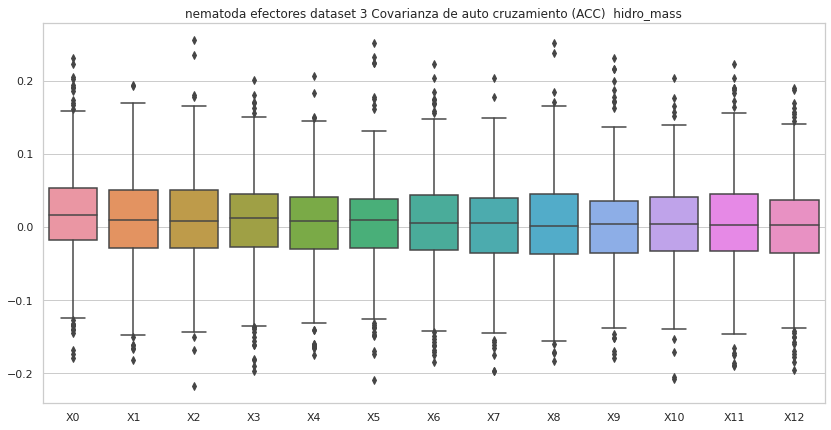

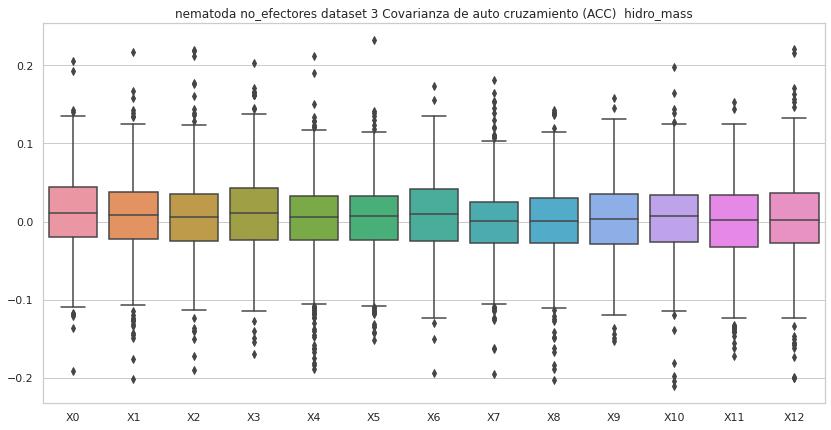

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.067574  0.014875  0.035373 -0.044539 -0.081174 -0.002364  0.026290   
1   -0.038948 -0.021504 -0.063170 -0.002248  0.041282  0.032201  0.005037   
2    0.032394 -0.166128 -0.030822 -0.140125 -0.140222 -0.057108  0.168507   
3    0.034751 -0.121128 -0.018064  0.151695  0.029766 -0.007470  0.081695   
4    0.038887 -0.178362  0.081188  0.217353  0.051034 -0.073401  0.031043   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.040382  0.063172 -0.017651 -0.128119  0.045118  0.051010  0.018887   
496  0.045805  0.001007 -0.026085 -0.056956  0.053699  0.035992 -0.011649   
497  0.027568  0.007965  0.007640 -0.043602 -0.019084  0.056352 -0.099296   
498  0.027346 -0.063347 -0.007162  0.006551  0.012856 -0.041870  0.027789   
499  0.095074  0.009

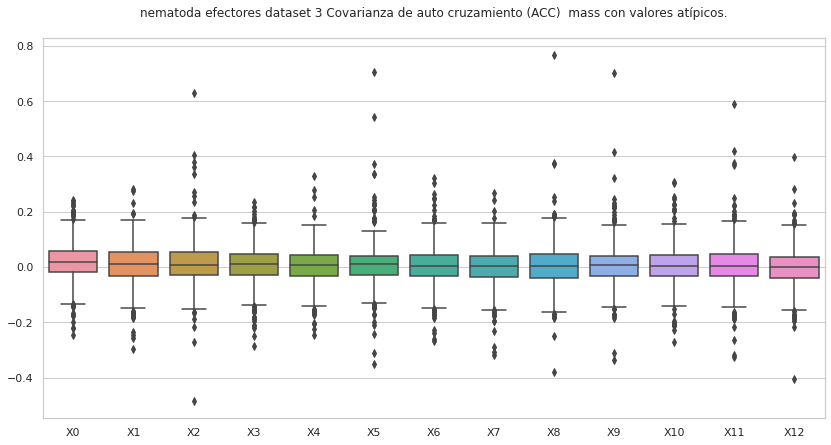

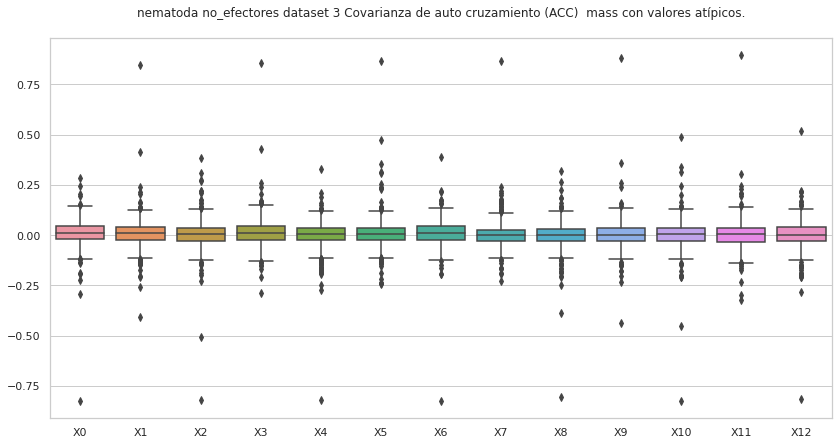

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.067574  0.014875  0.035373 -0.044539 -0.081174 -0.002364  0.026290   
1   -0.038948 -0.021504 -0.063170 -0.002248  0.041282  0.032201  0.005037   
2    0.032394 -0.166128 -0.030822 -0.140125 -0.140222 -0.057108  0.168507   
6    0.231971  0.115592  0.136653  0.120364  0.125282  0.251953  0.223327   
8   -0.037751  0.101132  0.235923 -0.039544  0.044689 -0.049065  0.069713   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.040382  0.063172 -0.017651 -0.128119  0.045118  0.051010  0.018887   
496  0.045805  0.001007 -0.026085 -0.056956  0.053699  0.035992 -0.011649   
497  0.027568  0.007965  0.007640 -0.043602 -0.019084  0.056352 -0.099296   
498  0.027346 -0.063347 -0.007162  0.006551  0.012856 -0.041870  0.027789   
499  0.095074  0.009598  0.064

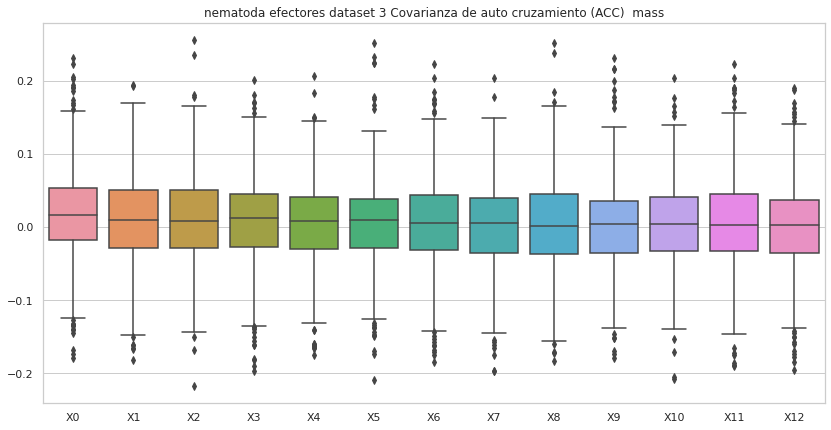

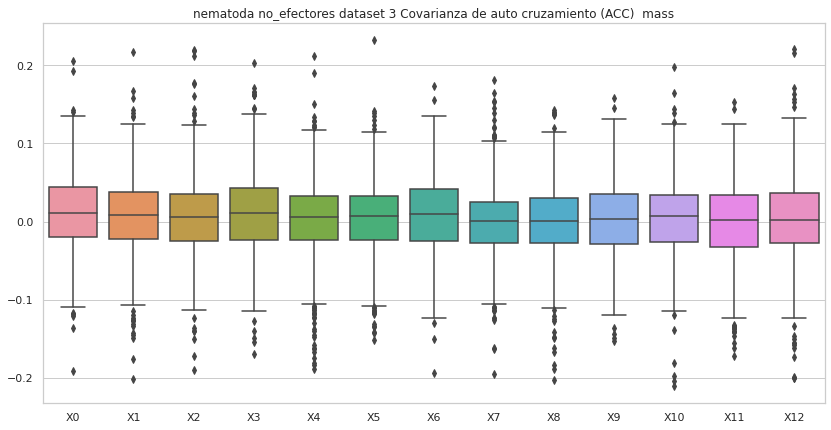

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.045981  0.098141  0.106728 -0.060690 -0.083583 -0.059933  0.038655   
1   -0.064242 -0.111209  0.002145 -0.092619 -0.108017  0.006212  0.173279   
2   -0.125122 -0.101022 -0.020189  0.041991 -0.120725  0.056036 -0.129436   
3    0.158284  0.049502  0.225241  0.205561  0.042274 -0.026775  0.296503   
4    0.158192  0.229680  0.317186  0.181821  0.113494  0.204116  0.200391   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.022047 -0.025041  0.001914 -0.045175  0.025893 -0.064922  0.115761   
496  0.117091  0.045035  0.060781  0.056875  0.002347 -0.012986  0.000166   
497  0.201939  0.032856  0.129623  0.086441  0.130097  0.160020  0.046970   
498 -0.006665 -0.001886  0.053790 -0.008732 -0.041052 -0.077728 -0.032580   
499  0.034034 -0.12

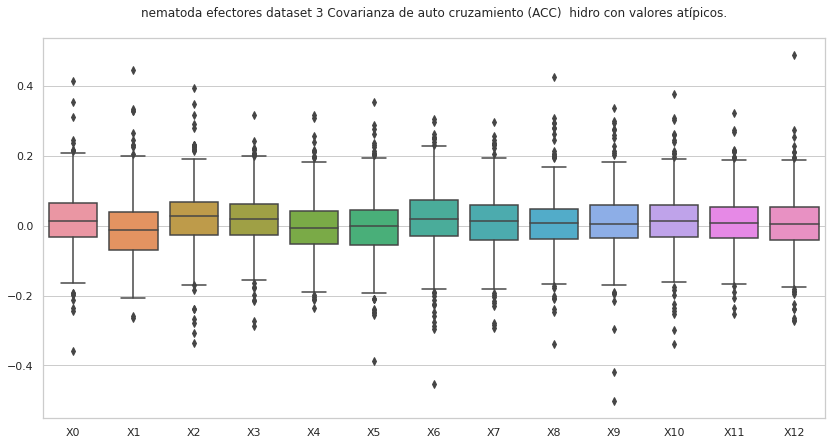

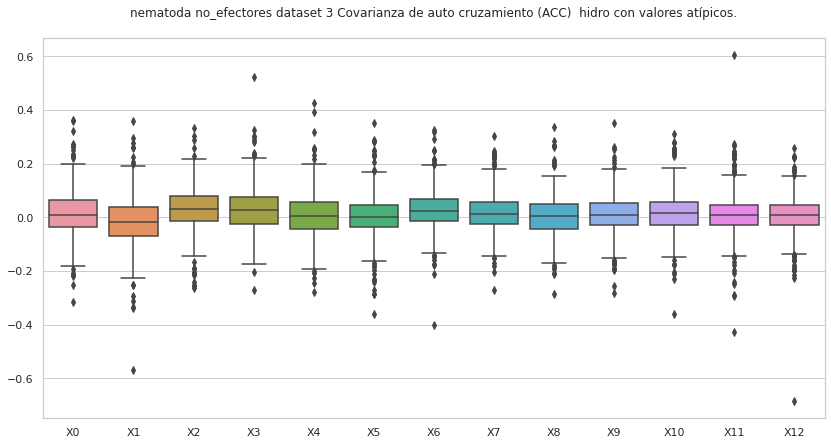

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.045981  0.098141  0.106728 -0.060690 -0.083583 -0.059933  0.038655   
1   -0.064242 -0.111209  0.002145 -0.092619 -0.108017  0.006212  0.173279   
2   -0.125122 -0.101022 -0.020189  0.041991 -0.120725  0.056036 -0.129436   
5   -0.008230  0.018932 -0.102613 -0.076962 -0.068001 -0.151432  0.064673   
6   -0.069047 -0.005825 -0.027232 -0.079459 -0.100788 -0.173063  0.129590   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.022047 -0.025041  0.001914 -0.045175  0.025893 -0.064922  0.115761   
496  0.117091  0.045035  0.060781  0.056875  0.002347 -0.012986  0.000166   
497  0.201939  0.032856  0.129623  0.086441  0.130097  0.160020  0.046970   
498 -0.006665 -0.001886  0.053790 -0.008732 -0.041052 -0.077728 -0.032580   
499  0.034034 -0.127440  

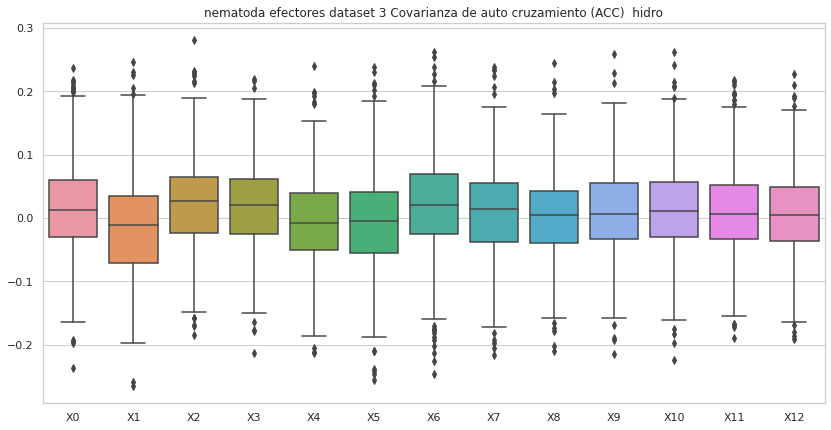

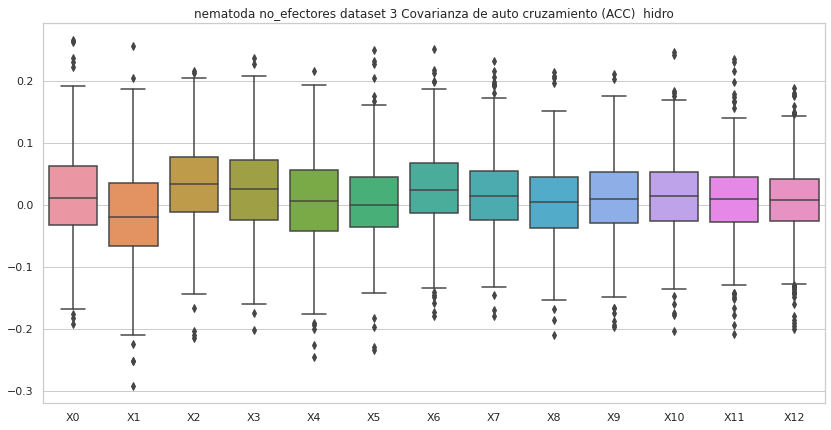

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))